# Plot history of Fermi LAT Variable Conductance Heat Pipe Duty Cycle

## VCHPs are plotted in the correct order
## Error Bars are plotted to show the VCHP "OFF" Duty Cycle values

### Robert Cameron
### January 2020

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
%matplotlib inline
plt.rc('font', size = 16)

In [2]:
%%script false

#read ASCII file of history of LAT LTC VCHP control

htrfile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/LTC/htr.scatter"
f = pd.read_csv(htrfile, parse_dates=[0], delimiter=" ",header=None)
dates = f[0]
htr = f[1]
val = f[2]
val0 = val - val
vals = [val0, val]

In [3]:
# read ASCII file of history of LAT LTC VCHP control

htrfile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/LTC/htr.history"

# create empty lists
dates = []
htr = []
val = []

# line-by-line read from history file
for line in open(htrfile):
    parts = line.strip().split('\t')
    d = parts[0]
    vchp_count = len(parts)//3 + 1
    for i in range(1,vchp_count):
        idx = (i-1)*3
        hp = int(parts[idx + 1])
        ct_max = int(parts[idx + 2])
        count = int(parts[idx + 3])
        if ct_max > 0 and count > 0:
            fraction = count/ct_max
            dates.append(d)
            htr.append(hp)
            val.append(fraction)
            
dates = pd.to_datetime(dates)
dates = pd.DataFrame(dates).squeeze()
htr = pd.DataFrame(htr).squeeze()
val = pd.DataFrame(val).squeeze()
val0 = val - val
vals = [val0, val]

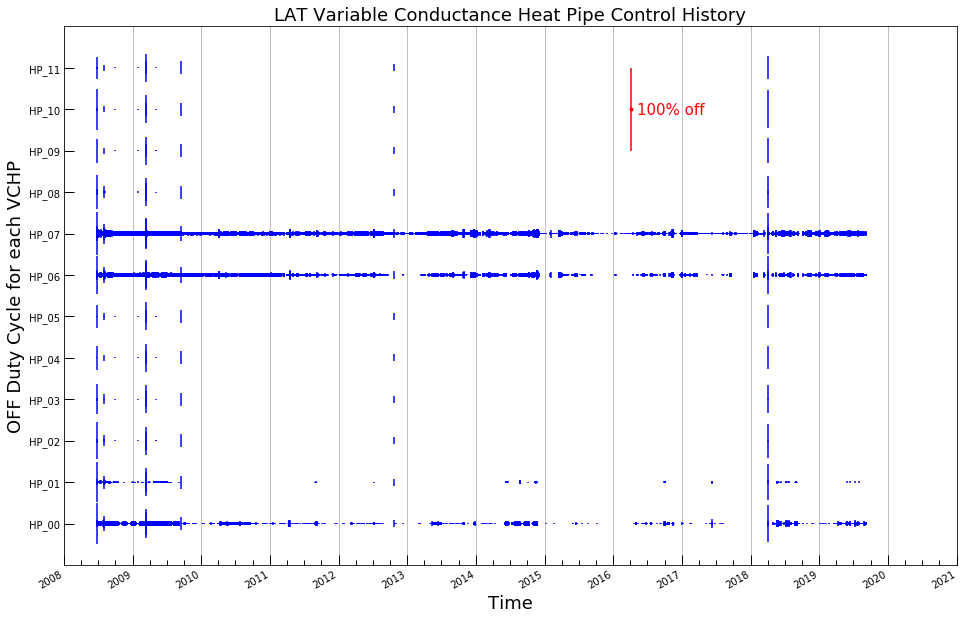

In [4]:
#plt.figure(figsize=(16,6))
fig, ax = plt.subplots(figsize = [16,11])

ax = plt.gca() # get the current axes

datemin = pd.to_datetime('2008-01-01')
datemax = pd.to_datetime('2021-01-01')
plt.xlim(datemin,datemax)
plt.ylim(-1,12)
ylabels = ('HP_00','HP_01','HP_02','HP_03','HP_04','HP_05','HP_06','HP_07','HP_08','HP_09','HP_10','HP_11')
plt.yticks(np.arange(12),ylabels)
plt.errorbar(dates, htr, yerr=val, color='b',marker='.')
plt.title('LAT Variable Conductance Heat Pipe Control History',size=18)
plt.ylabel('OFF Duty Cycle for each VCHP',size=18)
plt.xlabel('Time',size=18)
#show 100% duty cycle scale in red
datehsc = ['2016-04-05']
datesc = [pd.to_datetime(d) for d in datehsc]
plt.errorbar(datesc,10.0,yerr=[1.0],color='r',marker='.')
datehtxt = '2016-05-05'
datetxt = pd.to_datetime(datehtxt)
plt.text(datetxt, 9.88, '100% off', color = 'r',size=15)

yrule = rrulewrapper(YEARLY, interval=1)
yloc = RRuleLocator(yrule)
mrule = rrulewrapper(MONTHLY, interval=3)
mloc = RRuleLocator(mrule)
ax.xaxis.set_major_locator(yloc)
ax.xaxis.set_minor_locator(mloc)

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter

adf.scaled[1./24] = '%H:%M'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y
ax.tick_params(which='major', length=10, width=1, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
plt.grid(axis='x')
fig.autofmt_xdate()

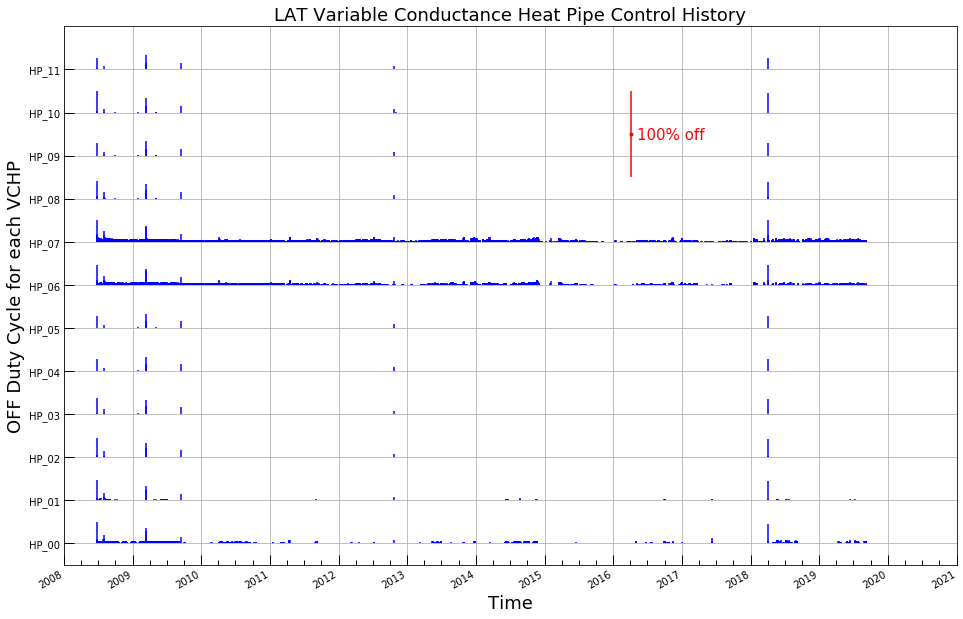

In [5]:
#plt.figure(figsize=(16,6))
fig, ax = plt.subplots(figsize = [16,11])

ax = plt.gca() # get the current axes

datemin = pd.to_datetime('2008-01-01')
datemax = pd.to_datetime('2021-01-01')
plt.xlim(datemin,datemax)
plt.ylim(-0.5,12)
ylabels = ('HP_00','HP_01','HP_02','HP_03','HP_04','HP_05','HP_06','HP_07','HP_08','HP_09','HP_10','HP_11')
plt.yticks(np.arange(12),ylabels)
plt.errorbar(dates, htr, yerr=vals, color='b',marker='.')
plt.title('LAT Variable Conductance Heat Pipe Control History',size=18)
plt.ylabel('OFF Duty Cycle for each VCHP',size=18)
plt.xlabel('Time',size=18)
#show 100% duty cycle scale in red
datehsc = ['2016-04-05']
datesc = [pd.to_datetime(d) for d in datehsc]
plt.errorbar(datesc,9.5,yerr=[1.0],color='r',marker='.')
datehtxt = '2016-05-05'
datetxt = pd.to_datetime(datehtxt)
plt.text(datetxt, 9.38, '100% off', color = 'r',size=15)

yrule = rrulewrapper(YEARLY, interval=1)
yloc = RRuleLocator(yrule)
mrule = rrulewrapper(MONTHLY, interval=3)
mloc = RRuleLocator(mrule)
ax.xaxis.set_major_locator(yloc)
ax.xaxis.set_minor_locator(mloc)

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter

adf.scaled[1./24] = '%H:%M'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y
ax.tick_params(which='major', length=10, width=1, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
#plt.grid(axis='x')
plt.grid()
fig.autofmt_xdate()

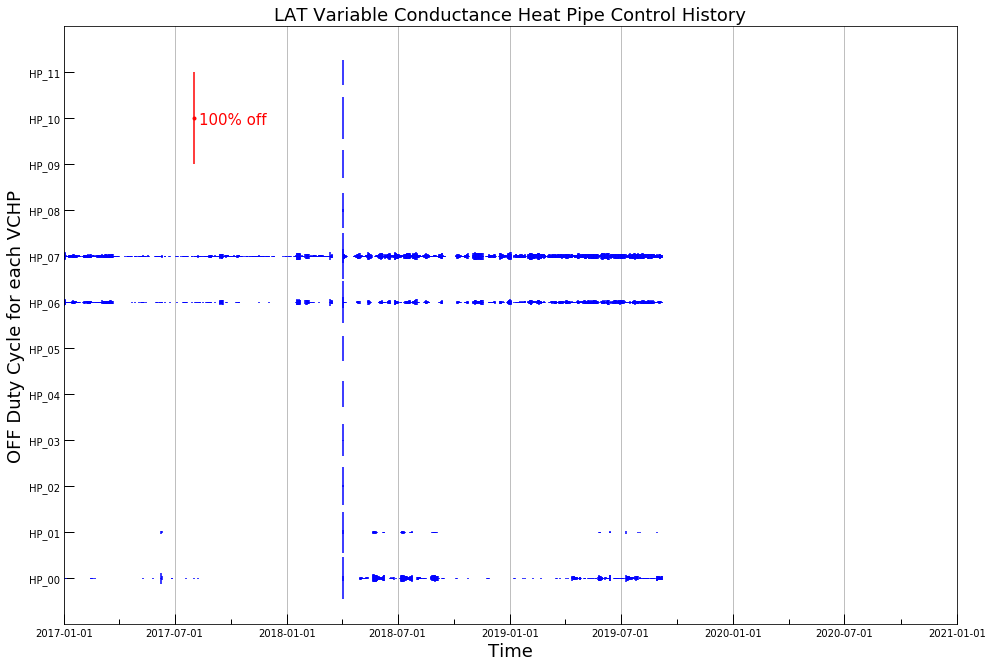

In [6]:
#plt.figure(figsize=(16,6))
fig, ax = plt.subplots(figsize = [16,11])

ax = plt.gca() # get the current axes

datemin = pd.to_datetime('2017-01-01')
datemax = pd.to_datetime('2021-01-01')
plt.xlim(datemin,datemax)
plt.ylim(-1,12)
ylabels = ('HP_00','HP_01','HP_02','HP_03','HP_04','HP_05','HP_06','HP_07','HP_08','HP_09','HP_10','HP_11')
plt.yticks(np.arange(12),ylabels)
plt.errorbar(dates, htr, yerr=val, color='b',marker='.')
plt.title('LAT Variable Conductance Heat Pipe Control History',size=18)
plt.ylabel('OFF Duty Cycle for each VCHP',size=18)
plt.xlabel('Time',size=18)
#show 100% duty cycle scale in red
datehsc = ['2017-08-01']
datesc = pd.to_datetime(datehsc)
plt.errorbar(datesc,10.0,yerr=[1.0],color='r',marker='.')
datehtxt = '2017-08-10'
datetxt = pd.to_datetime(datehtxt)
plt.text(datetxt, 9.88, '100% off', color = 'r',size=15)

yrule = rrulewrapper(MONTHLY, interval=6)
yloc = RRuleLocator(yrule)
mrule = rrulewrapper(MONTHLY, interval=3)
mloc = RRuleLocator(mrule)
ax.xaxis.set_major_locator(yloc)
ax.xaxis.set_minor_locator(mloc)

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter

adf.scaled[1./24] = '%H:%M'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y-%m-%d' # set the > 1year x-axis scale to Y
ax.tick_params(which='major', length=10, width=1, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')
plt.grid(axis='x')
#fig.autofmt_xdate()